In [1]:
from pathlib import Path
import os

iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
count = 0
for root, folders, filenames in os.walk('/kaggle/input'):
    print(root, folders, filenames)

/kaggle/input ['d'] []
/kaggle/input/d ['thomasaghavnian'] []
/kaggle/input/d/thomasaghavnian ['big-data-for-dl-untokinenized'] []
/kaggle/input/d/thomasaghavnian/big-data-for-dl-untokinenized [] ['data_for_dl_20230802.csv']


In [2]:
# if iskaggle:
#     !pip install -Uqq fastai
# else:
#     import zipfile,kaggle
#     path = Path('us-patent-phrase-to-phrase-matching')
#     kaggle.api.competition_download_cli(str(path))
#     zipfile.ZipFile(f'{path}.zip').extractall(path)

In [3]:
from fastai.text.all import *

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import ast
from sklearn.model_selection import train_test_split

# Construct clean data for multi-label text classification
## Load clean data

In [5]:
def filter_tags(x, nb_tags):
        return [item for item in x if item in TAGSlist_to_predict[:nb_tags]]
# Python function to convert a list to string using join() function

# Function to convert
def listToString(s):

	# initialize an empty string
	str1 = ","

	# return string
	return (str1.join(s))


# Driver code
s = ['Geeks', 'for', 'Geeks']
print(listToString(s))

Geeks,for,Geeks


In [6]:
path2tags = Path('/kaggle/input/d/thomasaghavnian/big-data-for-dl-untokinenized')
path2tags.ls()

(#1) [Path('/kaggle/input/d/thomasaghavnian/big-data-for-dl-untokinenized/data_for_dl_20230802.csv')]

In [7]:
# df_train = pd.read_csv(path/'train.csv', header=None)

df_0 = pd.read_csv(path2tags/'data_for_dl_20230802.csv', index_col=[0], low_memory=False)
print(df_0.shape)

df_0.head()

(30894, 14)


,Title,Body,Tags,Id,FavoriteCount,AnswerCount,Title_bow,Body_bow,Body_bow_lem,Title_bow_lem,Tags_words,unique_commn_tag,unique_rare_tag,unique_tag
0,Get content of span,"how can I get the contents of span ?I'm looking for a way for all of this to be vanilla, not jQueryjavascript (and a little jQuery)var swear_words_arr=new Array(""bad"",""evil"",""freak"");var regex = new RegExp('\\b(' + swear_words_arr.join('|') + ')\\b', 'i' );function validate_user_text() {var text = document.getElementById('myInput');text.text();if(regex.test(text)) { window.location=""http://www.newlocation.com""; return false;}}var myVar=setInterval(function(){validate_user_text()},1000);changehere's my html&lt;div id=""textArea""&gt;&lt;span id=""myInput"" contenteditable=""true""&gt;kfjdkf...",<javascript><jquery><html><forms><contenteditable>,20875775,0.0,5,get content span,"get contents span looking way vanilla jqueryjavascript little jquery var swear_words_arr=new array bad evil freak var regex new regexp '\\b swear_words_arr.join function validate_user_text var text document.getelementbyid 'myinput text.text regex.test text window.location= www.newlocation.com return false var myvar=setinterval function validate_user_text ,1000 changehere html div id= textarea span id= myinput contenteditable= true kfjdkfj span div form name= form1 method= post action= textarea rows= cols= name= user_text style= border:2 solid 808080 font family verdana arial helvetica font...","get content span looking way vanilla jqueryjavascript little jquery var swear_words_arr=new array bad evil freak var regex new regexp '\\b swear_words_arr.join function validate_user_text var text document.getelementbyid 'myinput text.text regex.test text window.location= www.newlocation.com return false var myvar=setinterval function validate_user_text ,1000 changehere html div id= textarea span id= myinput contenteditable= true kfjdkfj span div form name= form1 method= post action= textarea rows= cols= name= user_text style= border:2 solid 808080 font family verdana arial helvetica font ...",get content span,"['javascript', 'jquery', 'html', 'forms', 'contenteditable']",javascript,contenteditable,javascript
1,VS 2010 configuration transformation produces unwanted white space during deployment,"I use the new VS 2010 configuration transformations to deploy websites. To replace a single setting of my ApplicationSettings I use the following configuration transformation:&lt;setting name=""TempPath"" serializeAs=""String"" xdt:Transform=""Replace"" xdt:Locator=""Match(name)""&gt; &lt;value&gt;C:\TEMP&lt;/value&gt;&lt;/setting&gt;Remark: There is no white space between C:\TEMP and the end tagThis transformation results in a setting with unwanted white space like this:&lt;setting name=""TempPath"" serializeAs=""String""&gt; &lt;value&gt;C:\TEMP &lt;/value&gt;&lt;/setting&gt;If I use this s...",<asp.net><visual-studio-2010><deployment><configuration><web-config>,3300210,0.0,3,2010 configuration transformation produces unwanted white space deployment,new 2010 configuration transformations deploy websites replace single setting applicationsettings following configuration transformation setting name= temppath serializeas= string xdt transform= replace xdt locator= match name value \temp value setting remark there white space \temp end tagthis transformation results setting unwanted white space like setting name= temppath serializeas= string value \temp value setting setting without trimming get faulty behaviour.any idea,new 2010 configuration transformation deploy website replace single setting applicationsettings following configuration transformation setting name= temppath serializeas= string xdt transform= replace xdt locator= match name value \temp value setting remark white space \temp end tagthis transformation result setting unwanted white space like setting name= temppath serializeas= string value \temp value setting setting without trimming get faulty behaviour.any idea,2010 configuration tr

In [8]:
df_0['Tags_words'] = df_0['Tags_words'].apply(lambda x: ast.literal_eval(x))
print(df_0.shape)

df_0.drop(columns=['Id' ,'FavoriteCount' ,'AnswerCount' , 'Title_bow' , 'Body_bow' ], inplace=True)

df_0['input'] = df_0['Title'] + " " + df_0['Body'] 
df_0.head()

(30894, 14)


,Title,Body,Tags,Body_bow_lem,Title_bow_lem,Tags_words,unique_commn_tag,unique_rare_tag,unique_tag,input
0,Get content of span,"how can I get the contents of span ?I'm looking for a way for all of this to be vanilla, not jQueryjavascript (and a little jQuery)var swear_words_arr=new Array(""bad"",""evil"",""freak"");var regex = new RegExp('\\b(' + swear_words_arr.join('|') + ')\\b', 'i' );function validate_user_text() {var text = document.getElementById('myInput');text.text();if(regex.test(text)) { window.location=""http://www.newlocation.com""; return false;}}var myVar=setInterval(function(){validate_user_text()},1000);changehere's my html&lt;div id=""textArea""&gt;&lt;span id=""myInput"" contenteditable=""true""&gt;kfjdkf...",<javascript><jquery><html><forms><contenteditable>,"get content span looking way vanilla jqueryjavascript little jquery var swear_words_arr=new array bad evil freak var regex new regexp '\\b swear_words_arr.join function validate_user_text var text document.getelementbyid 'myinput text.text regex.test text window.location= www.newlocation.com return false var myvar=setinterval function validate_user_text ,1000 changehere html div id= textarea span id= myinput contenteditable= true kfjdkfj span div form name= form1 method= post action= textarea rows= cols= name= user_text style= border:2 solid 808080 font family verdana arial helvetica font ...",get content span,"[javascript, jquery, html, forms, contenteditable]",javascript,contenteditable,javascript,"Get content of span how can I get the contents of span ?I'm looking for a way for all of this to be vanilla, not jQueryjavascript (and a little jQuery)var swear_words_arr=new Array(""bad"",""evil"",""freak"");var regex = new RegExp('\\b(' + swear_words_arr.join('|') + ')\\b', 'i' );function validate_user_text() {var text = document.getElementById('myInput');text.text();if(regex.test(text)) { window.location=""http://www.newlocation.com""; return false;}}var myVar=setInterval(function(){validate_user_text()},1000);changehere's my html&lt;div id=""textArea""&gt;&lt;span id=""myInput"" contentedita..."
1,VS 2010 configuration transformation produces unwanted white space during deployment,"I use the new VS 2010 configuration transformations to deploy websites. To replace a single setting of my ApplicationSettings I use the following configuration transformation:&lt;setting name=""TempPath"" serializeAs=""String"" xdt:Transform=""Replace"" xdt:Locator=""Match(name)""&gt; &lt;value&gt;C:\TEMP&lt;/value&gt;&lt;/setting&gt;Remark: There is no white space between C:\TEMP and the end tagThis transformation results in a setting with unwanted white space like this:&lt;setting name=""TempPath"" serializeAs=""String""&gt; &lt;value&gt;C:\TEMP &lt;/value&gt;&lt;/setting&gt;If I use this s...",<asp.net><visual-studio-2010><deployment><configuration><web-config>,new 2010 configuration transformation deploy website replace single setting applicationsettings following configuration transformation setting name= temppath serializeas= string xdt transform= replace xdt locator= match name value \temp value setting remark white space \temp end tagthis transformation result setting unwanted white space like setting name= temppath serializeas= string value \temp value setting setting without trimming get faulty behaviour.any idea,2010 configuration transformation produce unwanted white space deployment,"[asp.net, visual-studio-2010, deployment, configuration, web-config]",asp.net,web-config,asp.net,"VS 2010 configuration transformation produces unwanted white space during deployment I use the new VS 2010 configuration transformations to deploy websites. To replace a single setting of my ApplicationSettings I use the following configuration transformation:&lt;setting name=""TempPath"" serializeAs=""String"" xdt:Transform=""Replace"" xdt:Locator=""Match(name)""&gt; &lt;value&gt;C:\TEMP&lt;/value&gt;&lt;/setting&gt;Remark: There is no white space between C:\TEMP and the end tagThis tra

## Create list of tags

In [9]:
flat_list = list(df_0['unique_rare_tag'])
# because all most common unique tags are 22
rarest_tags = [item[0] for item in Counter(flat_list).most_common(80)]
(list(df_0['unique_commn_tag'].unique()) + rarest_tags)

TAGSlist_to_predict = list(df_0['unique_commn_tag'].unique()) + rarest_tags
TAGSlist_to_predict

['javascript',
 'asp.net',
 'ios',
 'python',
 'sql',
 'c#',
 'html',
 'ruby-on-rails',
 '.net',
 'c++',
 'android',
 'c',
 'java',
 'jquery',
 'objective-c',
 'windows',
 'linux',
 'php',
 'r',
 'iphone',
 'node.js',
 'git',
 'razor',
 'ajax',
 'eloquent',
 'spring-data',
 'asp.net-core-mvc',
 'twitter-bootstrap',
 'task',
 'jquery-mobile',
 'mobile-safari',
 'spring-mvc',
 'linq-to-entities',
 'task-parallel-library',
 'mongoose',
 'jdbc',
 'activerecord',
 'selenium-chromedriver',
 'uikit',
 'linq-to-sql',
 'memory-leaks',
 'asp.net-identity',
 'c#-4.0',
 'local-storage',
 'json.net',
 'ipad',
 'asp.net-mvc-4',
 'controller',
 'spring-data-jpa',
 'annotations',
 'computer-vision',
 'uibutton',
 'java-native-interface',
 'java-stream',
 'apache-spark-sql',
 'file-upload',
 'moq',
 'build.gradle',
 'asp.net-mvc-3',
 'orm',
 'socket.io',
 'ios6',
 'jsp',
 'assert',
 nan,
 'c#-3.0',
 'cors',
 'apple-push-notifications',
 'file-io',
 'jax-rs',
 'xcode4',
 'django-rest-framework',
 'singl

In [10]:
nb_tags = 6
df_0['Target_tags'] = df_0['Tags_words'].apply(lambda x: filter_tags(x, nb_tags)).apply(lambda x: listToString(x))
df_0['Target_tags'].nunique()

29

In [11]:
df_0['Target_tags'].unique()

array(['javascript', 'asp.net', 'ios', 'python', 'sql', 'c#', '',
       'c#,asp.net', 'javascript,asp.net', 'c#,javascript', 'c#,sql',
       'c#,sql,asp.net', 'c#,asp.net,sql', 'asp.net,javascript',
       'c#,asp.net,javascript', 'javascript,c#', 'javascript,python',
       'python,sql', 'javascript,ios', 'c#,python', 'python,ios',
       'c#,ios', 'c#,javascript,asp.net', 'javascript,c#,asp.net',
       'javascript,sql', 'asp.net,sql', 'javascript,sql,ios', 'sql,ios',
       'sql,asp.net'], dtype=object)

In [12]:
df_0 = df_0.drop(df_0[df_0['Target_tags'] == ''].index, axis=0)
print(df_0.shape[0])

df_0.head()

15816


,Title,Body,Tags,Body_bow_lem,Title_bow_lem,Tags_words,unique_commn_tag,unique_rare_tag,unique_tag,input,Target_tags
0,Get content of span,"how can I get the contents of span ?I'm looking for a way for all of this to be vanilla, not jQueryjavascript (and a little jQuery)var swear_words_arr=new Array(""bad"",""evil"",""freak"");var regex = new RegExp('\\b(' + swear_words_arr.join('|') + ')\\b', 'i' );function validate_user_text() {var text = document.getElementById('myInput');text.text();if(regex.test(text)) { window.location=""http://www.newlocation.com""; return false;}}var myVar=setInterval(function(){validate_user_text()},1000);changehere's my html&lt;div id=""textArea""&gt;&lt;span id=""myInput"" contenteditable=""true""&gt;kfjdkf...",<javascript><jquery><html><forms><contenteditable>,"get content span looking way vanilla jqueryjavascript little jquery var swear_words_arr=new array bad evil freak var regex new regexp '\\b swear_words_arr.join function validate_user_text var text document.getelementbyid 'myinput text.text regex.test text window.location= www.newlocation.com return false var myvar=setinterval function validate_user_text ,1000 changehere html div id= textarea span id= myinput contenteditable= true kfjdkfj span div form name= form1 method= post action= textarea rows= cols= name= user_text style= border:2 solid 808080 font family verdana arial helvetica font ...",get content span,"[javascript, jquery, html, forms, contenteditable]",javascript,contenteditable,javascript,"Get content of span how can I get the contents of span ?I'm looking for a way for all of this to be vanilla, not jQueryjavascript (and a little jQuery)var swear_words_arr=new Array(""bad"",""evil"",""freak"");var regex = new RegExp('\\b(' + swear_words_arr.join('|') + ')\\b', 'i' );function validate_user_text() {var text = document.getElementById('myInput');text.text();if(regex.test(text)) { window.location=""http://www.newlocation.com""; return false;}}var myVar=setInterval(function(){validate_user_text()},1000);changehere's my html&lt;div id=""textArea""&gt;&lt;span id=""myInput"" contentedita...",javascript
1,VS 2010 configuration transformation produces unwanted white space during deployment,"I use the new VS 2010 configuration transformations to deploy websites. To replace a single setting of my ApplicationSettings I use the following configuration transformation:&lt;setting name=""TempPath"" serializeAs=""String"" xdt:Transform=""Replace"" xdt:Locator=""Match(name)""&gt; &lt;value&gt;C:\TEMP&lt;/value&gt;&lt;/setting&gt;Remark: There is no white space between C:\TEMP and the end tagThis transformation results in a setting with unwanted white space like this:&lt;setting name=""TempPath"" serializeAs=""String""&gt; &lt;value&gt;C:\TEMP &lt;/value&gt;&lt;/setting&gt;If I use this s...",<asp.net><visual-studio-2010><deployment><configuration><web-config>,new 2010 configuration transformation deploy website replace single setting applicationsettings following configuration transformation setting name= temppath serializeas= string xdt transform= replace xdt locator= match name value \temp value setting remark white space \temp end tagthis transformation result setting unwanted white space like setting name= temppath serializeas= string value \temp value setting setting without trimming get faulty behaviour.any idea,2010 configuration transformation produce unwanted white space deployment,"[asp.net, visual-studio-2010, deployment, configuration, web-config]",asp.net,web-config,asp.net,"VS 2010 configuration transformation produces unwanted white space during deployment I use the new VS 2010 configuration transformations to deploy websites. To replace a single setting of my ApplicationSettings I use the following configuration transformation:&lt;setting name=""TempPath"" serializeAs=""String"" xdt:Transform=""Replace"" xdt:Locator=""Match(name)""&gt; &lt;value&gt;C:\TEMP&lt;/value&gt;&lt;/setting&gt;Remark: There is no white space between C:\TEMP 

## SPLIT STRATIFIED DATA INTO TEST AND TRAIN

In [13]:
X= df_0['input']
y = df_0['Tags_words'].apply(lambda x: filter_tags(x, nb_tags))
 # Select the relevant columns
df_0.head()

,Title,Body,Tags,Body_bow_lem,Title_bow_lem,Tags_words,unique_commn_tag,unique_rare_tag,unique_tag,input,Target_tags
0,Get content of span,"how can I get the contents of span ?I'm looking for a way for all of this to be vanilla, not jQueryjavascript (and a little jQuery)var swear_words_arr=new Array(""bad"",""evil"",""freak"");var regex = new RegExp('\\b(' + swear_words_arr.join('|') + ')\\b', 'i' );function validate_user_text() {var text = document.getElementById('myInput');text.text();if(regex.test(text)) { window.location=""http://www.newlocation.com""; return false;}}var myVar=setInterval(function(){validate_user_text()},1000);changehere's my html&lt;div id=""textArea""&gt;&lt;span id=""myInput"" contenteditable=""true""&gt;kfjdkf...",<javascript><jquery><html><forms><contenteditable>,"get content span looking way vanilla jqueryjavascript little jquery var swear_words_arr=new array bad evil freak var regex new regexp '\\b swear_words_arr.join function validate_user_text var text document.getelementbyid 'myinput text.text regex.test text window.location= www.newlocation.com return false var myvar=setinterval function validate_user_text ,1000 changehere html div id= textarea span id= myinput contenteditable= true kfjdkfj span div form name= form1 method= post action= textarea rows= cols= name= user_text style= border:2 solid 808080 font family verdana arial helvetica font ...",get content span,"[javascript, jquery, html, forms, contenteditable]",javascript,contenteditable,javascript,"Get content of span how can I get the contents of span ?I'm looking for a way for all of this to be vanilla, not jQueryjavascript (and a little jQuery)var swear_words_arr=new Array(""bad"",""evil"",""freak"");var regex = new RegExp('\\b(' + swear_words_arr.join('|') + ')\\b', 'i' );function validate_user_text() {var text = document.getElementById('myInput');text.text();if(regex.test(text)) { window.location=""http://www.newlocation.com""; return false;}}var myVar=setInterval(function(){validate_user_text()},1000);changehere's my html&lt;div id=""textArea""&gt;&lt;span id=""myInput"" contentedita...",javascript
1,VS 2010 configuration transformation produces unwanted white space during deployment,"I use the new VS 2010 configuration transformations to deploy websites. To replace a single setting of my ApplicationSettings I use the following configuration transformation:&lt;setting name=""TempPath"" serializeAs=""String"" xdt:Transform=""Replace"" xdt:Locator=""Match(name)""&gt; &lt;value&gt;C:\TEMP&lt;/value&gt;&lt;/setting&gt;Remark: There is no white space between C:\TEMP and the end tagThis transformation results in a setting with unwanted white space like this:&lt;setting name=""TempPath"" serializeAs=""String""&gt; &lt;value&gt;C:\TEMP &lt;/value&gt;&lt;/setting&gt;If I use this s...",<asp.net><visual-studio-2010><deployment><configuration><web-config>,new 2010 configuration transformation deploy website replace single setting applicationsettings following configuration transformation setting name= temppath serializeas= string xdt transform= replace xdt locator= match name value \temp value setting remark white space \temp end tagthis transformation result setting unwanted white space like setting name= temppath serializeas= string value \temp value setting setting without trimming get faulty behaviour.any idea,2010 configuration transformation produce unwanted white space deployment,"[asp.net, visual-studio-2010, deployment, configuration, web-config]",asp.net,web-config,asp.net,"VS 2010 configuration transformation produces unwanted white space during deployment I use the new VS 2010 configuration transformations to deploy websites. To replace a single setting of my ApplicationSettings I use the following configuration transformation:&lt;setting name=""TempPath"" serializeAs=""String"" xdt:Transform=""Replace"" xdt:Locator=""Match(name)""&gt; &lt;value&gt;C:\TEMP&lt;/value&gt;&lt;/setting&gt;Remark: There is no white space between C:\TEMP 

In [14]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.1,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14234,) (1582,) (14234,) (1582,)


In [15]:
print(y_train.head())

45199       [ios]
37600    [python]
48304        [c#]
17334       [sql]
5259     [python]
Name: Tags_words, dtype: object


## Create train and test sets

In [16]:
dff_multiclas = pd.concat([X_train, y_train], axis=1)
dff_multiclas['Tags_words'] = dff_multiclas['Tags_words'].apply(lambda x: listToString(x))
dff_multiclas = dff_multiclas.rename(columns = {'Tags_words':'labels'})

dff_multiclas.head()

,input,labels
45199,"Ionic config.xml different widget id for different platforms We use &lt;widget id=""com.activityo"" version=""0.0.1"" xmlns=""http://www.w3.org/ns/widgets"" xmlns:cdv=""http://cordova.apache.org/ns/1.0""&gt;for android and need to change widget id for ios.I mean i want to use 2 different widget id for different platforms.Is there anyway ?? thanks",ios
37600,"Python SSL connection ""EOF occurred in violation of protocol"" I'm using Django Celery task to connect to Facebook Graph API with requests lib using Gevent. Issue I'm constantly running at is that every now and then I get EOF occurred in violation of protocol exception. I've searched around and various sources offer different fixes but none seems to work. I've tried monkey patching the ssl module(gevent.monkey.patch_all()) and some others too but no luck. I'm not even sure if this is openssl issue as some sources might suggest as I haven't encountered it before applying Gevent optimisationC...",python
48304,"ODP.NET for both 32bit and 64bit I am developing application which uses ODP.NET to connect to Oracle DB. I would like to have one version for both 32bit and 64bit machines. The problem is that I couldn't figure out how to build projetc with anycpu target, seems it requires the target to be the same as ODP driver version. So it means that I need to have to versions of the same application one for 32bit and other for 64bit. But the same was not problem while using MS .NET Oracle client (System.Data.OracleClient). Is there a way to have the same behavior using ODP.NET as on MS .NET client?",c#
17334,"Why doesn't ORACLE allow consecutive newline characters in commands? I write:CREATE TABLE Person ( name CHAR(10),ssn INTEGER);and save it to a file &quot;a.sql&quot;.If I then run it by typing &quot;@a&quot; in the SQL*Plus command prompt, it will tell me that the line starting with &quot;ssn&quot; is not recognized as a command, and is ignored.From what I gather, it seems that sqlplus terminates a command if it encounters multiple newline characters in a row. Is this an accurate statement? If so, does anyone know if this is necessary/ why it chooses to do this?",sql
5259,"What's the algorithm of 'set.intersection()' in python? First of all, my purpose is to randomly get only one element in both known sets. So my original method is firstly intersect two sets. And then randomly pick up a element from the intersected set. But this is foolish, because that I only need a elements but a intersected set. So I need to find the algorithm of set.intersection().I compare the cost time between the methods of 'set.intersection()' and 'for{for{}}'. Set.intersection() is more faster than other one(100 times). So using 'for{for{}}' to pick up a randomly elements is not a w...",python


In [17]:
dff_multiclas.to_csv('/kaggle/working/train.csv')

In [18]:
test = pd.concat([X_test, y_test], axis=1)
test['Tags_words'] = test['Tags_words'].apply(lambda x: listToString(x))
test = test.rename(columns = {'Tags_words':'labels'})

test.head()


,input,labels
28724,"How to cache connections to different Postgres/MySQL databases in Golang? I am having an application where different users may connect to different databases (those can be either MySQL or Postgres), what might be the best way to cache those connections across different databases? I saw some connection pools but seems like they are more for one db multiple connections than for multiple db multiple connections.PS:For adding more context, I am designing a multi tenant architecture where each tenant connects to one or multiple databases, I have an option for using map[string]*sql.DB where the ...",sql
587,"Is it possible to convert between Socket and TcpClient objects? Here's another C#/.NET question based merely on curiousity more than an immediate need ...If you had a Socket instance and you wanted to wrap it in the higher-level TcpClient class, is that possible and how would you do it?Conversely if you have an instance of TcpClient, is it possible to get the underlying Socket?",c#
6722,"How to make a PInvoke friendly native-API? How to make a native API to be PInvoke friendly?there are some tips on how to modify native-programs to be used with P/Invoke here. But before I even write a native programs, what are the things I should look out to make my programs/library PInvoke friendly?using C or C++ are fine.update:if I write a C API, what are the things I have to do so that It is P/Invoke-able using C# syntax like the following:[DLLimport(""MyDLL.dll"")]is it possible to do the same with native C++ code/library?Summary/Rephrase of Some Tips to make a P/Invoke friendly native-...",c#
21805,"detecting pinch to zoom on iOS I am trying to detect a pinch to zoom event on iOS (and Android really) because I am using jQuery Mobile to show pages with a fixed header. In a dream world what I'd like is for the header not to zoom but for the rest of the page to do so. But I know this is not possible.On most pages I have a mobile version that resizes itself nicely making zooming un-necessary, but on the 'front cover' the client wants the user to be able to see the whole page (shrunk to fit) with the fixed header large enough to be usable (i.e. the same size proportionately as on the mobil...",ios
40937,"Keras: Making a neural network to find a number's modulus I'm an experienced Python developer, but a complete newbie in machine learning. This is my first attempt to use Keras. Can you tell what I'm doing wrong?I'm trying to make a neural network that takes a number in binary form, and outputs its modulo when dividing by 7. (My goal was to take a very simple task just to see that everything works.)In the code below I define the network and I train it on 10,000 random numbers. Then I test it on 500 random numbers.For some reason the accuracy that I get is around 1/7, which is the accuracy y...",python


In [19]:
test.to_csv('/kaggle/working/test.csv')

# DEFINE DATALOADERS
## Dataloaders for language model

In [20]:
# path=Path('/kaggle/input/nlp-train')
# path.ls()
# dff_multiclas=pd.read_csv(path/'train.csv', index_col=[0], low_memory=False)
# dff_multiclas.head()

In [21]:
# DEFINE DATALOADERS USING HIGH-LEVEL API
dls_lm = TextDataLoaders.from_df(dff_multiclas,text_col='input', label_col='labels',
                        is_lm=True, valid_pct=0.1,seed=42)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [22]:
dls_lm.show_batch()

,text,text_
0,"xxbos xxup arc - xxmaj the meaning of _ _ xxunk ? xxmaj just want to make sure that i got it right : do i need to _ _ xxunk objects that i do n't xxunk an object is _ _ xxunk xxmaj do i need to use assign in the @property ? xxmaj does that mean that the object is not retained , and just refers to the object i","xxup arc - xxmaj the meaning of _ _ xxunk ? xxmaj just want to make sure that i got it right : do i need to _ _ xxunk objects that i do n't xxunk an object is _ _ xxunk xxmaj do i need to use assign in the @property ? xxmaj does that mean that the object is not retained , and just refers to the object i assign"
1,", xxunk , xxunk } , { xxunk , xxunk , xxunk } ] ) ; function xxunk , colours ) { var parts = xxunk - 1 ; var gradient = new xxmaj xxunk ) ; var xxunk = 0 ; var partsteps = xxmaj xxunk / parts ) ; var remainder = steps - ( partsteps * parts ) ; for ( var col = 0 ; col < parts","xxunk , xxunk } , { xxunk , xxunk , xxunk } ] ) ; function xxunk , colours ) { var parts = xxunk - 1 ; var gradient = new xxmaj xxunk ) ; var xxunk = 0 ; var partsteps = xxmaj xxunk / parts ) ; var remainder = steps - ( partsteps * parts ) ; for ( var col = 0 ; col < parts ;"
2,"xxunk - xxunk ) } < / span > } < span xxunk "" style= { { ' display ' : xxunk ? ' block ' : ' none ' } } > < / span > < / div > < / div > ) ; redux form field : xxunk xxunk "" type=""text "" classname=""input form - flow extra - padding - datepicker "" xxunk } xxunk , "" years","- xxunk ) } < / span > } < span xxunk "" style= { { ' display ' : xxunk ? ' block ' : ' none ' } } > < / span > < / div > < / div > ) ; redux form field : xxunk xxunk "" type=""text "" classname=""input form - flow extra - padding - datepicker "" xxunk } xxunk , "" years """
3,var xxunk in xxunk ( xxrep 3 ) { xxunk ) ; } } as can be seen i am using lock everywhere . xxmaj this is a multi threading software . xxmaj all hsproxylist is being used in xxunk - it is a c # xxup wpf application xxbos uitabbaritem icon not colored correctly for ios 13 when a bar tint color is specified in xxmaj interface xxmaj builder in xxmaj,xxunk in xxunk ( xxrep 3 ) { xxunk ) ; } } as can be seen i am using lock everywhere . xxmaj this is a multi threading software . xxmaj all hsproxylist is being used in xxunk - it is a c # xxup wpf application xxbos uitabbaritem icon not colored correctly for ios 13 when a bar tint color is specified in xxmaj interface xxmaj builder in xxmaj xcode
4,"xxunk = ( function ( ) { return xxunk || xxunk || xxunk || function ( callback ) { xxunk , 1 xxrep 3 0 / 60 ) ; } ; } ) ( ) ; / / https : / / github.com / xxunk / xxunk xxmaj stats = function ( ) { var e = xxmaj date.now ( ) , t = e ; var n = 0 , r","= ( function ( ) { return xxunk || xxunk || xxunk || function ( callback ) { xxunk , 1 xxrep 3 0 / 60 ) ; } ; } ) ( ) ; / / https : / / github.com / xxunk / xxunk xxmaj stats = function ( ) { var e = xxmaj date.now ( ) , t = e ; var n = 0 , r ="
5,"can a xxmaj join be thought of as an "" intersection "" ? xxmaj but what about the "" linking "" or "" xxunk union "" aspect of it ? xxbos xxmaj speech xxmaj recognition got an error on ios xxmaj i 'm studying the xxmaj speech xxmaj recognition on the ios , but xxmaj every time i call the method [ _ xxunk xxunk ] , it always got an error","a xxmaj join be thought of as an "" intersection "" ? xxmaj but what about the "" linking "" or "" xxunk union "" aspect of it ? xxbos xxmaj speech xxmaj recognition got an error on ios xxmaj i 'm studying the xxmaj speech xxmaj recognition on the ios , but xxmaj every time i call the method [ _ xxunk xxunk ] , it always got an error in"
6,) in c # ? xxbos xxmaj bower and grunt globally or locally ? xxmaj we have xxunk not to install anything globally because we may work on many different projects at the same time that requires different versions of the same libraries . xxmaj but what about bower and grunt ? xxmaj everywhere in the xxmaj internet i see npm install -g xxunk know that grunt

## Dataloaders for text classification model with inheritance from language model vocab

In [23]:
# Creating a Datablock
block = DataBlock(
    blocks=(TextBlock.from_df('input', seq_len=224, vocab=dls_lm.vocab), MultiCategoryBlock),
    get_x=ColReader('text'),
    get_y=ColReader('labels', label_delim=','),
    splitter=RandomSplitter(seed=42)
)

# Creating DataLoaders
dls_clas = block.dataloaders(dff_multiclas, bs=4)
dls_clas.show_batch(n=5)

,text,None
0,"xxbos xxmaj module build failed ( from . / node_modules / mini - css - extract - plugin / dist / loader.js ): referenceerror : document is not defined xxmaj ok , xxmaj so basically xxmaj we use webpack to bundle our resources before deployment . xxmaj however , now we want to also bundle our sass files through webpack is it simplifies our build process.it was going well , but now bundle.js is too big to deploy on production so i wanted to split bundle.js and styling files . i do n't much know about plugins and all , so i searched a little bit and found that mini - css - extract - plugin lets me split style files into a new file . xxmaj so i went and tweaked the xxunk file according to the docs xxunk - css - extract - plugin but i am getting",javascript
1,"xxbos bouncycastle undefined length xxup asn1 i try to get a x509certificate2 from a xxunk x509certificate and a xxup pkcs12 . i use the following code : certificate = new xxunk , password , xxunk generate the rawdata , like the following : using ( memorystream xxunk = new memorystream ( ) ) { xxunk [ ] chain = new xxunk ] ; xxunk ] = new xxunk ) ; xxunk , new xxunk ) , chain ) ; xxunk , xxunk ( ) , random ) ; var rawdata = xxunk problem is , that i get the following exception : after some days of researching , i figured out , that the problem is based on the xxmaj mono implementation of xxup asn1 . xxmaj this implementation does n't allow "" undefined length encoding "" . xxmaj if i use the code on xxmaj windows it works great.my",c#
2,"xxbos how to configure angular - cli project for rc5 ? xxmaj trying to install angular - cli to work with angular 2 rc5 and xxmaj i 'm facing some errors : cannot find the name ' xxunk have installed ' npm install -g angular - xxunk ' and it seems he does nt install typings so webstorm does n't know "" xxunk i have xxunk with no xxunk installed ' npm install typings --save ' but there was no xxunk the webstorm project configuration i enabled : ( does n't xxunk . xxmaj use typescript service ( xxunk . xxmaj enable typescript xxunk xxmaj track xxunk . xxmaj use xxunk tsconfig i changed target from es5 to es6 and now webstorm recognize promise / then / catch but typescript throw error that he does n't know it and now i face new error on every class in every component",javascript
3,"xxbos ios xxmaj refresh button in xxmaj view xxmaj controller xxmaj nav : reloading all tableviewcells created from parsed xxup json when clicked xxmaj i 've got a fairly important conceptual issue that many people have asked about , but there is n't a readily available clear answer to be found by xxunk application is simple : xxmaj several rows of tableviewcells populated with data from a parsed xxup json feed . xxmaj when a cell is clicked on , that cell 's info is passed to a xxunk and displayed . xxmaj the xxup json feed is also stored to a .plist and in the case that the internet is not available , the tableviewcells are populated from the xxunk is all working xxunk , the last thing i need is a refresh button at the top of my firstviewcontroller to refresh the xxup json feed , and all",ios


# ULMFit approach
## Build a language model

In [24]:
learn_lm = language_model_learner(dls_lm, AWD_LSTM, metrics=[error_rate, accuracy, Perplexity()],
                                  model_dir="/tmp/model/", wd=0.1).to_fp16()
learn_lm.summary()

SequentialRNN (Input shape: 64 x 72)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 72 x 1152      
LSTM                                                           
LSTM                                                           
____________________________________________________________________________
                     64 x 72 x 400       
LSTM                                                           
RNNDropout                                                     
RNNDropout                                                     
RNNDropout                                                     
____________________________________________________________________________
                     64 x 72 x 37736     
Linear                                    15132136   True      
RNNDropout                                                     
____________________________________________________________________________

Total params: 15,132,136
Tota

In [25]:
learn_lm.fit_one_cycle(1, 5e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,4.587916,4.334137,0.726002,0.273998,76.259155,04:23


Error rate quite low but perplexity high and accuracy low, needs further tuning

In [26]:
learn_lm.save('1epoch')

Path('/tmp/model/1epoch.pth')

In [27]:
learn_lm.unfreeze()
learn_lm.fit_one_cycle(8, 1e-3)
#Another strategy is to fit for 7 epochs using 1e-3 and then with a reduced learning rate for 3 more epochs

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,4.163451,4.046666,0.683792,0.316208,57.206394,06:12
1,3.855088,3.828425,0.659369,0.340631,45.990067,06:13
2,3.681716,3.715283,0.645909,0.354091,41.070213,06:20
3,3.527412,3.642838,0.638122,0.361878,38.200085,04:48
4,3.403727,3.597091,0.632783,0.367218,36.491924,04:36
5,3.311975,3.567848,0.628494,0.371506,35.440250,04:49
6,3.240001,3.553033,0.626629,0.373371,34.919052,06:30
7,3.243432,3.553859,0.626138,0.373862,34.947922,06:25


While error_rate isn't improved by more than 9%, perplexity is reduced by around 40%. We can here use a reduced learning rate to run two or three more epochs

In [29]:
learn_lm.fit_one_cycle(1, 1e-2)
# !! THIS IS NOT A REDUCED LEARNING RATE !! WTF

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,3.679924,3.690162,0.641448,0.358552,40.051323,04:44


SuggestedLRs(valley=0.0005754399462603033)

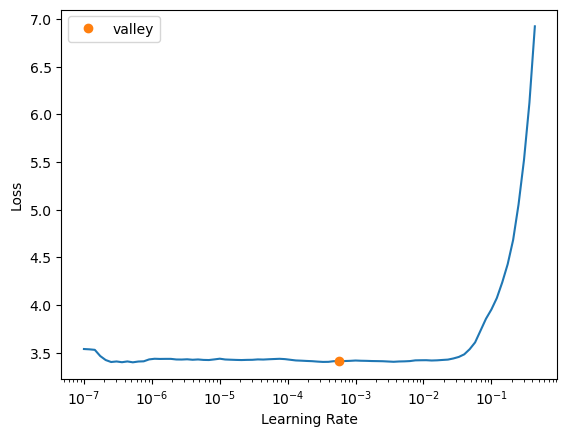

In [34]:
learn_lm.recorder.lr_find()
# learn_lm.recorder.plot_lr_find()

In [35]:
learn_lm.fit_one_cycle(1, 5e-4)

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,3.451712,3.644682,0.635547,0.364453,38.270615,06:15


In [38]:
learn_lm.save_encoder('finetuned_lm')

In [39]:
# export encoder for download
learn_lm.save('/kaggle/working/finetuned_lm')

Path('/kaggle/working/finetuned_lm.pth')

## Test the language model

In [36]:
TEXT = "I want to use Python for data science. Do I also need to "
N_WORDS = 40
N_SENTENCES = 2
preds = [learn_lm.predict(TEXT, N_WORDS, temperature=0.75) 
         for _ in range(N_SENTENCES)]

In [37]:
print("\n".join(preds))

i want to use Python for data science . Do i also need to use class code , which has similar data like the following code : import numpy as npimport pandas as pdimport numpy as pltimport numpy as npfrom pylab import Byfrom django.shortcuts import Byfrom keras.layers import Sequentialfrom keras.layers import
i want to use Python for data science . Do i also need to use R , if so , what would be the proper way to do this ? Is it possible to use a lambda function like this ? How to run the script with the ASP.NET


## Training a text classifier
### Define learner

In [40]:
learn_clas = text_classifier_learner(dls_clas, AWD_LSTM, drop_mult=0.5, model_dir="/tmp/model/", 
                                metrics=[partial(accuracy_multi, thresh=0.5), RocAucMulti(), F1ScoreMulti()])

### Load pre-tuned language model

In [41]:
learn_clas = learn_clas.load_encoder('finetuned_lm')

### Train classifier

In [42]:
learn_clas.fit_one_cycle(1, 2e-2)

epoch,train_loss,valid_loss,accuracy_multi,roc_auc_score,f1_score,time
0,0.209478,0.358227,0.949285,0.965123,0.735015,06:24


In [43]:
learn_clas.freeze_to(-2)
learn_clas.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2))

epoch,train_loss,valid_loss,accuracy_multi,roc_auc_score,f1_score,time
0,0.192975,0.120657,0.959475,0.976676,0.798677,07:07


In [44]:
learn_clas.freeze_to(-3)
learn_clas.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3))

epoch,train_loss,valid_loss,accuracy_multi,roc_auc_score,f1_score,time
0,0.171240,0.098705,0.966561,0.982151,0.846178,09:13


In [45]:
learn_clas.predict('I want to use Python for data science. DO i need to leanr rust or c#?')

((#1) ['python'],
 tensor([False, False, False, False,  True, False]),
 tensor([6.4284e-04, 8.6515e-03, 2.4688e-03, 3.3995e-02, 9.0844e-01, 1.9119e-04]))

In [47]:
learn_clas.predict('Can I use react to develop an app?')

((#1) ['javascript'],
 tensor([False, False, False,  True, False, False]),
 tensor([0.0012, 0.0116, 0.0949, 0.6377, 0.0118, 0.0017]))

In [ ]:
learn_clas.freeze_to(-4)
learn_clas.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-3))

In [ ]:
learn_clas.predict('I want to use Python for data science')

In [48]:
# Save the text classification model
learn_clas.save('text_clas_model')


Path('/tmp/model/text_clas_model.pth')

In [50]:
# export encoder for download
learn_lm.save('/kaggle/working/text_clas_model')

Path('/kaggle/working/text_clas_model.pth')